# Week3授業前課題２　住宅情報の分析

In [25]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 【問題1】データセットの取得

In [26]:
Ames = pd.read_csv("train.csv")
Ames.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


### 【問題2】データセット自体の調査

各住宅の最終価格を予測することを目的としたコンペ用のデータセット。アイオワ州エイムスの住宅に関する７９の説明変数を持つ。テストセットの各Idについて、販売価格変数の値を予測するためのデータセットです。


### 【問題3】データの確認

・各特徴量がどういったものかを見る。（数値データか文字データなど）

In [27]:
# 説明変数（特徴量：data）をXに格納
X = pd.DataFrame(Ames.drop("SalePrice", axis=1))
# print(X.dtypes) # データのタイプを確認
X.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

・今回の目的変数はどの列か確認する。

データフィールドより：このデータセットの目的変数はSalePriceと言える<br>
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

In [29]:
# 目的変数をyに格納
y = pd.DataFrame(Ames["SalePrice"])
y.head(4)

,SalePrice
0,208500
1,181500
2,223500
3,140000


・特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [30]:
X.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


### 【問題4】欠損値への対応

・各特徴量の欠損値の有無を確認する。

In [31]:
nan_Ames_sum = pd.DataFrame(Ames.isnull().sum()) # 列ごとの欠損値の合計。
nan_Ames_sum.columns = ["nan"]
nan_Ames_sum

,nan
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


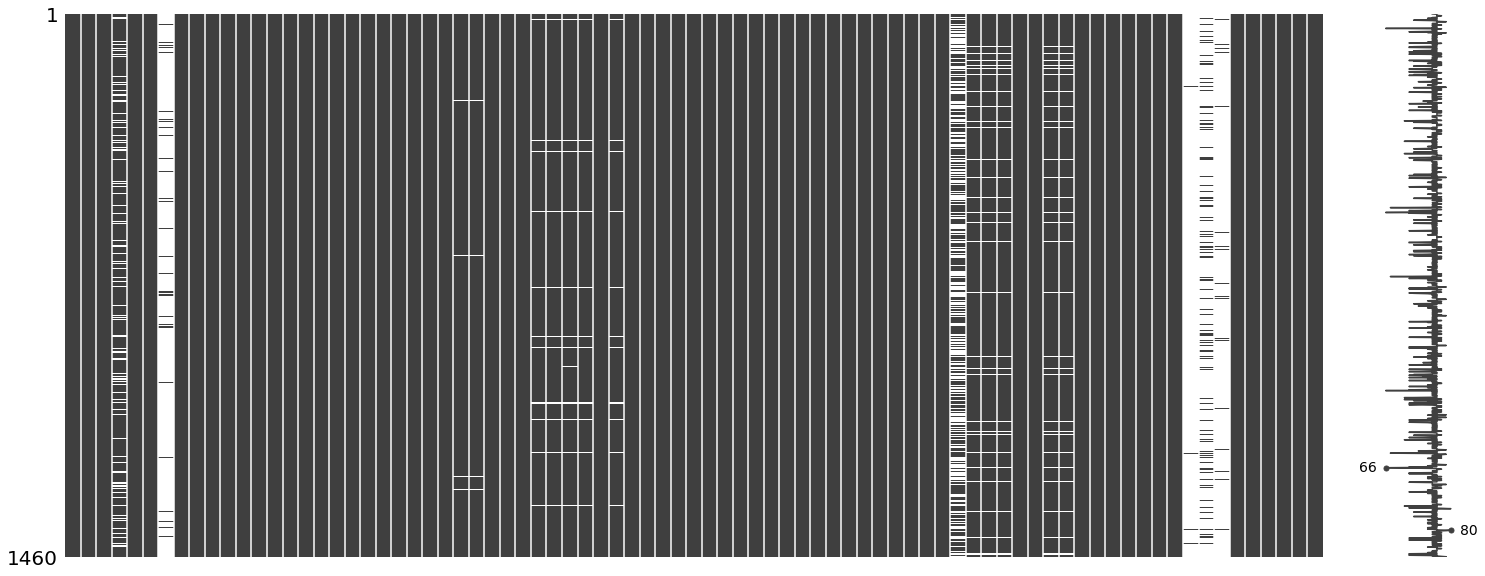

In [32]:
# 欠損値の全体像を見る
msno.matrix(Ames)

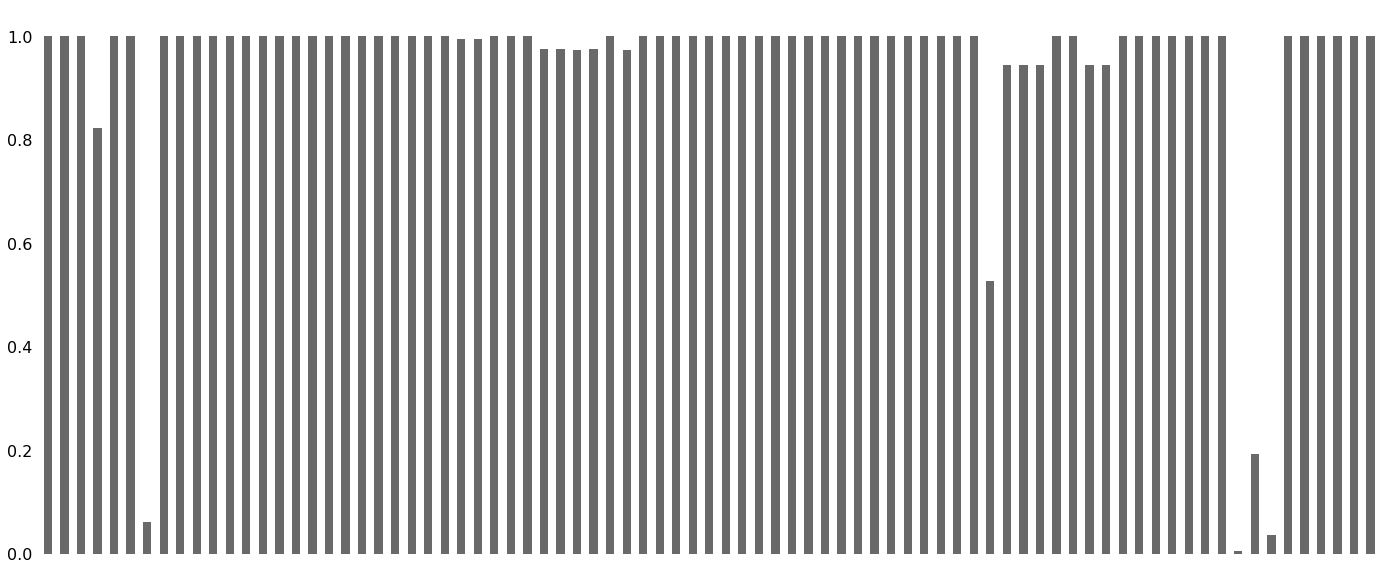

In [33]:
# 特徴量ごとの欠損していない割合を見る
msno.bar(Ames)

・欠損値が何パーセント含まれるかを確認する

In [34]:
# 特徴量ごとの欠損値の割合(欠損値がある行のみ)

only_nan_Ames = nan_Ames_sum[nan_Ames_sum["nan"] != 0] # 欠損値のみのリスト:nan_X_sum(欠損値の合計リスト)から０列が０以外の値を取得
only_nan_index = only_nan_Ames.index # 欠損値のみのインデックスを取得
nan_Ames_per = (nan_Ames_sum/len(Ames)).round(3) # 欠損値の割合：nan_X_sum（欠損値の合計数）割るXの要素数
nan_Ames_per = pd.DataFrame(nan_Ames_per, index=only_nan_index) # nan_X_perのデータフレーム
nan_Ames_per = pd.concat([only_nan_Ames,nan_Ames_per], axis=1) # len(X)列をnan_X_perに加える
nan_Ames_per.columns = ["total_nan", "nan(%)"] # 列名を指定

#only_nan_count # 正常
#only_nan_Ames # 正常
# only_nan_index # 正常（１次元配列）
nan_Ames_per

,total_nan,nan(%)
LotFrontage,259,0.177
Alley,1369,0.938
MasVnrType,8,0.005
MasVnrArea,8,0.005
BsmtQual,37,0.025
BsmtCond,37,0.025
BsmtExposure,38,0.026
BsmtFinType1,37,0.025
BsmtFinType2,38,0.026
Electrical,1,0.001


・5つ以上欠損値がある特徴量（列）は削除する。

In [35]:
many_nan = only_nan_Ames[only_nan_Ames>=5] # 5つ以上欠損値がある列
many_nan_columns = many_nan.index #列名リストを取得
#many_nan_columns # 列名リストを確認

processed_list1 = Ames.drop(many_nan_columns, axis=1) # 列リストで指定した列を削除
display(processed_list1.head(10))


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


・欠損値があるサンプル（行）は削除する

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


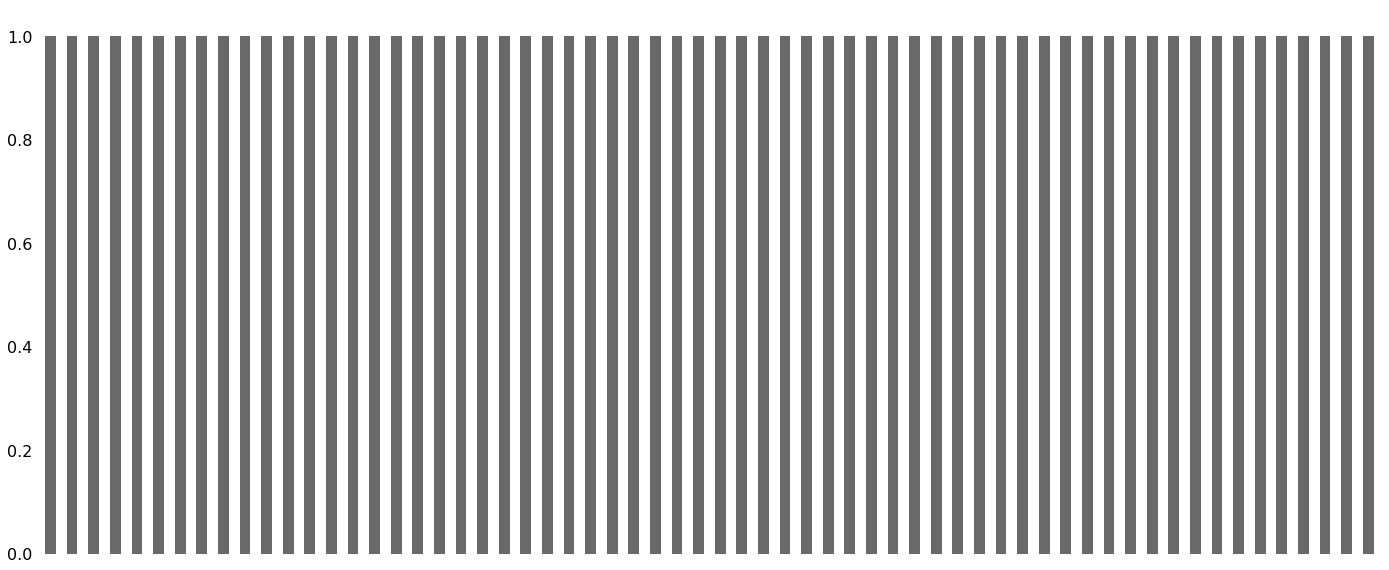

In [36]:
processed_list2 = processed_list1.dropna(how='any')
display(processed_list2.head(10))
msno.bar(processed_list2) # 欠損がないことを確認

### 【問題5】用語の調査

・歪度（わいど、英, skewness）は、分布の左右対称性の違いを示し、正規分布からどれだけ歪んでいるかを表す統計量。データの個数 : データ全体の平均値 : データ全体の標準偏差 : 歪度 の値によって分布の左右対称性がわかる。 正規分布のように左右対称の分布の場合、０となる。

・尖度
尖度（せんど、英: kurtosis)は、確率変数の確率密度関数や頻度分布の鋭さを表す数字である。 正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾を持った分布を持ち、尖度が小さければより丸みがかったピークと短く細い尾を持った分布であるという事が判断できる。正規分布の場合、０となる。

確率変数 X が従う分布の尖度，歪度は以下のように定義される：　<br>
歪度：(E[(X−μ)3]) / σ3<br>
尖度：(E[(X−μ)4]) / σ4) −3

### 【問題6】分布の確認

・seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

歪度


1.8828757597682129

尖度


6.536281860064529

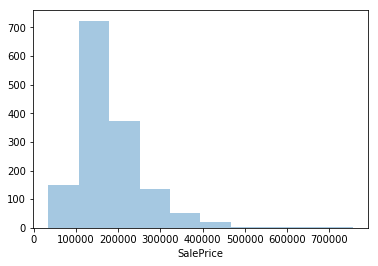

In [37]:
target = Ames["SalePrice"]
display(sns.distplot(target, kde=False, rug=False, bins=10))
print("歪度")
display(target.skew())
print("尖度")
display(target.kurtosis())

・目的変数に対して対数変換を行う。

In [38]:
target_log = target.apply(np.log)

display(target.head())
display(target_log.head())


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

歪度


0.12133506220520406

尖度


0.8095319958036296

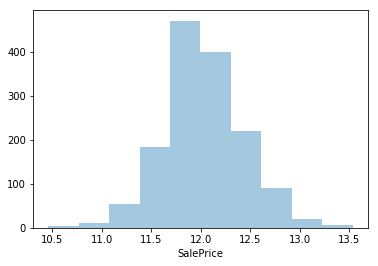

In [39]:
display(sns.distplot(target_log, kde=False, rug=False, bins=10))
print("歪度")
display(target_log.skew())
print("尖度")
display(target_log.kurtosis())

説明：対数変換を行ったことで、尖度、歪度共に数値が小さくなり、正規分布に近づいたことがわかる。特に尖度は６と数値が大きかったが、０.８まで縮められた。

### 【問題7】相関係数の確認

・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [40]:
corr_matrix = processed_list2.corr(method='pearson')
#print(corr_matrix)

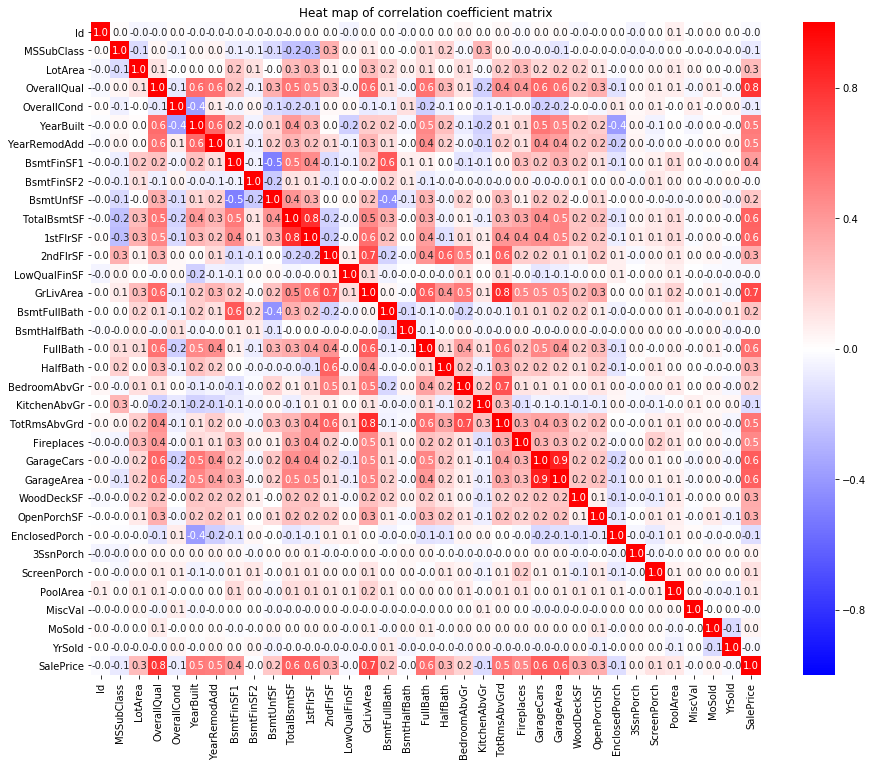

In [58]:
plt.subplots(figsize=(15, 12))
plt.title('Heat map of correlation coefficient matrix')
sns.heatmap(corr_matrix,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に各要素の値を表示
            fmt='.1f',
            xticklabels = 1, # x軸
            yticklabels = 1, # y軸
            cmap= "bwr"
           )
plt.show()

考察・気づき：元のデータは６２カラムあったはずだが、ヒートマップには半分しか表示されなかった。特徴量の最後の方にはあまり相関の高いものがなかった。

・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

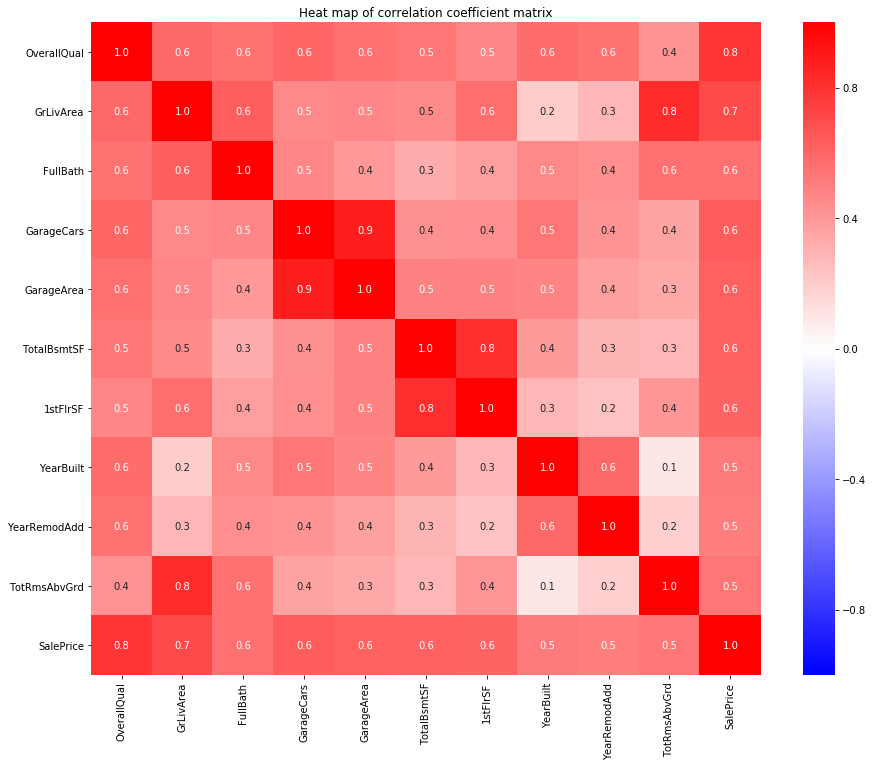

In [59]:
# 相関の高い特徴量＋目的変数のリスト
columns_10 = ['OverallQual', 'GrLivArea', 'FullBath', 'GarageCars',
              'GarageArea', 'TotalBsmtSF', '1stFlrSF',   'YearBuilt',
              'YearRemodAdd', 'TotRmsAbvGrd', 'SalePrice']

# 欠損値を除いたデータprocessed_list2から、相関の高い１０列を取り出す
list_10 = processed_list2[columns_10]
#list_10

# 相関係数行列を作成
corr_matrix10 = list_10.corr(method='pearson')
#print(corr_matrix10)

plt.subplots(figsize=(15, 12))
plt.title('Heat map of correlation coefficient matrix')
sns.heatmap(corr_matrix10,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に各要素の値を表示
            fmt='.1f',
            cmap= "bwr"
           )
plt.show()


考察：目的変数と相関の高い１０の項目は、他の特徴量との相関も高めに出るものが多かった。

・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

['TotalBsmtSF',地下室の総平方フィート／'1stFlrSF',1階の広さ（平方フィート）]<br>
['GarageCars',自動車容量のガレージサイズ／'GarageArea',ガレージサイズ（平方フィート）]<br>
['GrLivArea', １階（地面）のリビングエリア平方フィート／'TotRmsAbvGrd', グレード以上の総客室数（バスルームは含まれません）]<br>



考察：地下室と１階の広さ、ガレージサイズなど、同じようなものは相関が高かった。１階リビング面積と総客室数の相関は、どちらも家の規模を表す指標として相関が高く出たのではと推測する。